In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error

import numpy as np
import pandas as pd
import patsy
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import feature_selection as f_select
from pandas.plotting import scatter_matrix
from pandas.plotting import bootstrap_plot
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
import bokeh.plotting
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [131]:
#All CSVs together
df_all = pd.read_csv('finaldataset_new.csv')

In [132]:
for col in df_all.columns:
    if len(df_all[col].unique()) == 1:
        df_all.drop(col,inplace=True,axis=1)
    df_all.iloc[:,:].replace("yes",1,inplace=True)
    df_all.iloc[:,:].replace("no",0,inplace=True) 
    df_all.fillna(0, axis = 1, inplace = True) 
df_all_new = df_all

In [133]:
df_all_new.columns = df_all_new.columns.str.replace(" ","_")
df_all_new.columns = df_all_new.columns.str.replace("-","_")

In [134]:
#remove electric

df_all_new["Horsepower_split"]= df_all_new.Horsepower.str.split('@').str[0]
df_all_new["Horsepower_split_str"]= df_all_new.Horsepower.str.split(' ').str[0].astype(float)

df_all_new["Base_engine_size_split"]= df_all_new.Base_engine_size.str.split(' ').str[0].astype(float)
df_all_new["Combined_MPG_split"]= df_all_new.Combined_MPG.str.split(' ').str[0].astype(float)

# df_all_new["price_split"]= df_all_new.price.str.split('$').str[1]
# df_all_new["price_split_str"]= df_all_new.price_split.str.split(' ').str[0]
# df_all_new["price_split_str"]= df_all_new.price_split.str.replace(',',"").astype(float)

#replace NaN with average
# df_all_new["Horsepower_split_str1"] = df_all_new["Horsepower_split_str"].fillna(df_all_new["Horsepower_split_str"].mean, inplace= True)
df_all_new['Horsepower_split_str1'] = pd.to_numeric(df_all_new['Horsepower_split_str'], errors='coerce')

# df_all_new.drop("Horsepower_split_str", inplace= True, axis=1)
# df_all_new.drop("Horsepower_split", inplace= True, axis=1)

#replace NaN with average of the group
df_all_new.groupby(['Base_engine_type'])['Combined_MPG_split'].mean()
df_all_new["Combined_MPG_split"].fillna(df_all_new.groupby("Base_engine_type")["Combined_MPG_split"].transform("mean"), inplace=True)
df_all_new

,2_front_headrests,2_rear_headrests,3_front_headrests,3_rear_headrests,Emergency_braking_assist,Front_and_rear_ventilated_disc_brakes,Front_center_3_point_belt,LED_headlamp,Passenger_airbag_deactivation_switch,Passenger_airbag_occupant_sensing_deactivation,...,Engine_Type,Total_Seating,Transmission,car_model,price,Horsepower_split,Horsepower_split_str,Base_engine_size_split,Combined_MPG_split,Horsepower_split_str1
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,5,8-speed automated manual,2018 Acura ILX Sedan Features & Specs | Edmunds,28100,206 hp,206.0,2.4,29.0,206.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,5,8-speed automated manual,2018 Acura ILX Sedan Features & Specs | Edmunds,28900,201 hp,201.0,2.4,29.0,201.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,5,8-speed automated manual,2018 Acura ILX Sedan Features & Specs | Edmunds,30100,201 hp,201.0,2.4,29.0,201.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,5,8-speed automated manual,2018 Acura ILX Sedan Features & Specs | Edmunds,33100,201 hp,201.0,2.4,29.0,201.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,5,8-speed automated manual,2018 Acura ILX Sedan Features & Specs | Edmunds,32100,201 hp,201.0,2.4,29.0,201.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,5,8-speed automated manual,2018 Acura ILX Sedan Features & Specs | Edmunds,35100,201 hp,201.0,2.4,29.0,201.0
6,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,5,8-speed automated manual,2018 Acura ILX Sedan Features & Specs | Edmunds,29400,201 hp,201.0,2.4,29.0,201.0
7,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,7,9-speed shiftable automatic,2019 Acura MDX SUV Features & Specs | Edmunds,52800,321 hp,321.0,3.0,23.0,321.0
8,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,6,9-speed shiftable automatic,2019 Acura MDX SUV Features & Specs | Edmunds,59550,290 hp,290.0,3.5,23.0,290.0
9,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,gas,7,9-speed shiftable automatic,2019 Acura MDX SUV Features & Specs | Edmunds,51300,290 hp,290.0,3.5,22.0,290.0


In [135]:
#get the number of yes's and no's
#if all yes, then drop
#drop rows with missing values

df_all_new.dropna(how='any')
#unique values of a column

#df_result_engine_overview_safety.to_csv("del.csv")
# df = pd.read_csv("finaldataset.csv")
df = df_all_new
#convert a column to categorical
df["Cylinders_y"] = df["Cylinders_y"].astype('category')
df["Drive_Train"] = df["Drive_Train"].astype('category')
df["Transmission"] = df["Transmission"].astype('category')
df= pd.get_dummies(df,  columns=["Cylinders_y", "Drive_Train", "Transmission"], drop_first = True,prefix=["cyl", "drive", "cat"])


In [136]:

df.columns.tolist()
df = df.loc[(df['Base_engine_type'] != ('flex-fuel (FFV)'))]
df = df.loc[(df['Base_engine_type'] != ('electric'))]

In [137]:
df.info()
df['log_price'] = df["price"].apply(np.log)
df['price_sqrt'] = df['price'].apply(np.sqrt)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 360
Data columns (total 87 columns):
2_front_headrests                                                   359 non-null float64
2_rear_headrests                                                    359 non-null float64
3_front_headrests                                                   359 non-null float64
3_rear_headrests                                                    359 non-null float64
Emergency_braking_assist                                            359 non-null float64
Front_and_rear_ventilated_disc_brakes                               359 non-null float64
Front_center_3_point_belt                                           359 non-null float64
LED_headlamp                                                        359 non-null float64
Passenger_airbag_deactivation_switch                                359 non-null float64
Passenger_airbag_occupant_sensing_deactivation                      359 non-null float64
Rear_

/Users/meenaa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


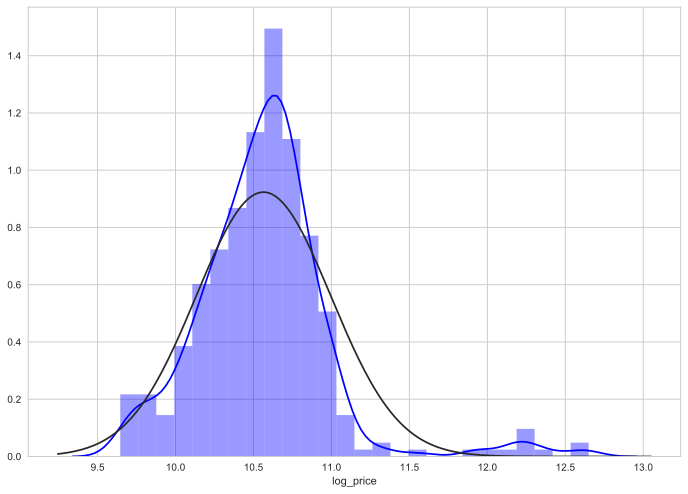

In [138]:
from scipy.stats import norm
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
#sns.distplot(df['price'],fit=norm)
sns_plot = sns.distplot(df['log_price'],fit=norm, color = "Blue")


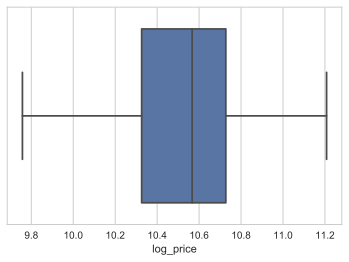

In [139]:
df = df.loc[(df['log_price'] > 9.75) & (df['log_price'] < 11.25)]
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["log_price"])


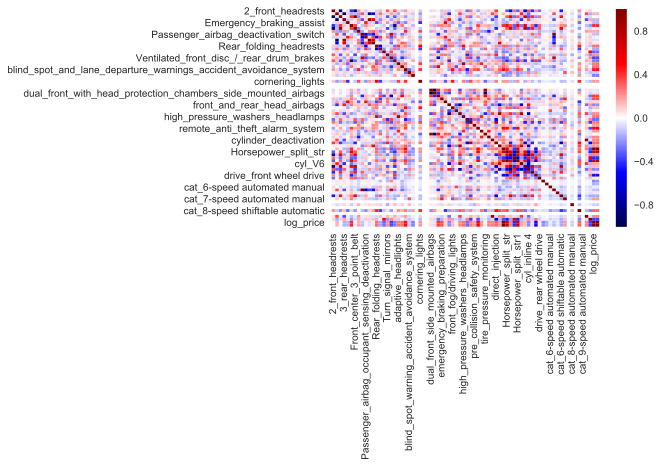

In [140]:
sns.heatmap(df.corr(), cmap="seismic", vmin=-1, vmax=1)

In [141]:
# from scipy.stats import norm
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
# a4_dims = (11.7, 8.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)
# #sns.distplot(df['price'],fit=norm)
# sns_plot = sns.distplot(df['num_sf'], color = "Blue")

In [142]:
c =df.columns.tolist()
#new_c = [x for x in c if x not in ("log_price","sqrt_price","Unnamed: 5", "Transmission","Front_center_3-point_belt", "LED_headlamp","Combined_MPG_split", "gas", "hybrid", "Rear_height_adjustable_headrests","engine_immobilizer","front_fog/driving_lights","pre-collision_safety_system","Ventilated_front_disc_/_solid_rear_disc_brakes","cornering_lights","front_fog/driving_lights","blind_spot_warning_accident_avoidance_system","flex_fuel","Turn_signal_mirrors","lane_departure_warning_accident_avoidance_system","Passenger_airbag_deactivation_switch","Rear_center_3-point_belt","emergency_braking_preparation","Ventilated_front_disc_/_rear_drum_brakes","Rear_door_child_safety_locks","brake_drying","Emergency_braking_assist")]
new_c = [x for x in c if x in ("Horsepower_split_str1","post_collision_safety_system","auto_delay_off_headlamps")]

In [143]:
y = df["log_price"]
X = df[new_c].select_dtypes(exclude = "object")

X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           3.48e-64
Time:                        22:07:42   Log-Likelihood:                 84.453
No. Observations:                 338   AIC:                            -160.9
Df Residuals:                     334   BIC:                            -145.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            9.7495      0.037    262.874      0.000       9.677       9.822
auto_delay_off_headlamps         0.0837      0.023      3.669      0.000       0.039       0.129
post_collision_safety_system     0.1426      0.021      6.733      0.000       0.101       0.184
Horsepower_split_str1            0.0025      0.000     19.022      0.000       0.002       0.003
==============================================================================
Omnibus:                        1.352   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.091
Skew:                          -0.098   Prob(JB):                        0.580
Kurtosis:                       3.198   Cond. No.                         987.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
y_testexp = np.exp(y)
pred_testexp= np.exp(fit.predict(X))
mse=mean_absolute_error(y_testexp, pred_testexp)

print("MSE",mse)


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

MSE 5819.277477915561
   VIF Factor                      features
0   12.933541                         const
1    1.047083      auto_delay_off_headlamps
2    1.003188  post_collision_safety_system
3    1.045240         Horsepower_split_str1


In [145]:
#DID NOT SET RANDOM SEED WHEN RUN INITIALLY.HENCE RESULTS WILL BE DIFFERENT.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

est=LinearRegression()
all_scores=[]
all_mse= []
d =X.columns.tolist()
new_d = [x for x in d if x not in ("const")]
X= X[new_d]

kf=KFold(n=len(X),n_folds=4,shuffle=True)

for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<=.05: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
    print('Coefficients: \n', est.coef_)
    y_testexp = np.exp(y_test)
    pred_testexp= np.exp(est.predict(x_test))
    mse=mean_absolute_error(y_testexp,pred_testexp)
    all_mse.append(mse)
print(all_scores)
print(sig_cols, pvals)
print("MSE",all_mse)
#r_21=est.score(x_test1[sig_cols],y_test1)

#average out the p values and get feature names

Coefficients: 
 [0.08145779 0.13828486 0.00243725]
Coefficients: 
 [0.09512214 0.15535458 0.00244835]
Coefficients: 
 [0.0893769  0.13697946 0.00258324]
Coefficients: 
 [0.06573983 0.13808782 0.00253306]
[0.6547371704717608, 0.6320496354897817, 0.3742563189872164, 0.5815904071473842]
['auto_delay_off_headlamps', 'post_collision_safety_system', 'Horsepower_split_str1'] [1.3876483188701448e-05, 7.934931885936192e-05, 8.041673091605515e-43]
MSE [6097.228979251943, 5360.892912851817, 6233.813928820901, 5862.309865184359]


In [146]:
#regularization ----NOT USED
X = df.select_dtypes(exclude = "object")

from sklearn import linear_model

kf = KFold(n=len(X),n_folds = 5, shuffle = False, random_state = 1)

# Find opmtimum value for alpha

error_dict = {}

for alpha in np.linspace(1,30,num=1000):

    error = 0

    for train,test in kf:
        x_train=X.iloc[train]
        y_train=y.iloc[train]
        x_test=X.iloc[test]
        y_test=y.iloc[test]

        
        
        clf = linear_model.Lasso(alpha)
        clf.fit(x_train,y_train)
        error += mean_squared_error(y_test,clf.predict(x_test))

    error_dict[alpha] = error

min_alpha = min(error_dict, key=error_dict.get)

print(min_alpha)
print(error_dict[min_alpha])

# Best alpha found is 0.15

# Fit model with optimum alpha

model  = sm.OLS(y,X)
fit = model.fit_regularized(method = 'elastic_net', L1_wt = 1, alpha = min_alpha)

# Find out which features to drop
for i,v in enumerate(fit.params):
    if v != 0:
        print(i+1)
        

1.087087087087087
0.015661313823172034
47
48
49
74


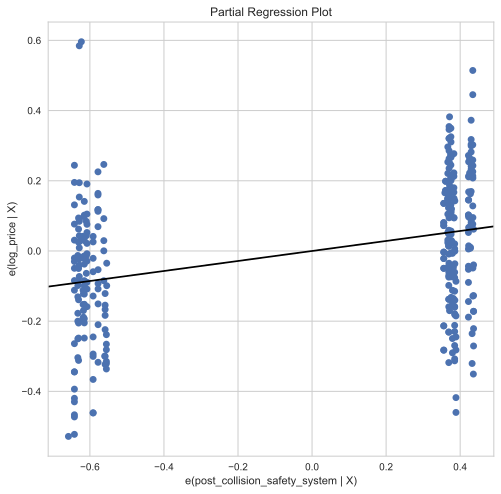

In [147]:
fix, ax = plt.subplots(figsize=(8,8))
fig = sm.graphics.plot_partregress("log_price", "post_collision_safety_system", ["Horsepower_split_str1","auto_delay_off_headlamps"],obs_labels = False,  data=df, ax=ax)